# Single Variable Calculus

:label:`sec_single_variable_calculus`


In :numref:`sec_calculus`, we saw the basic elements of differential calculus.  This section takes a deeper dive into the fundamentals of calculus and how we can apply it and understand it in the context of machine learning.

## Differential Calculus
Differential calculus is fundamentally the study of how functions behave under small changes.  To see why this is so core to deep learning, let us consider an example.

Suppose that we have a deep neural network where the weights are for convenience all concatenated into a single vector $\mathbf{w} = (w_1, \ldots, w_n)$.  Given a training dataset, we consider the loss of our neural network on this dataset, which we will write as $\mathcal{L}(\mathbf{w})$.  

This function is extraordinarily complex, encoding the performance of all possible models of the given architecture on this dataset, so it is nearly impossible to tell what set of weights $\mathbf{w}$ will make the loss as small as possible. Thus, in practice, we often start by initializing our weights *randomly*, and then iteratively take small steps in the direction which makes the weights decrease as rapidly as possible.

The question then becomes something that on the surface is no easier: how do we find the direction which makes the weights decrease as quickly as possible?  To dig into this, let us first examine the case with only a single weight: $L(\mathbf{w}) = L(x)$ for a single real value $x$. 

To be specific, we take $x$ and change it a small amount to $x + \epsilon$, where $\epsilon$ is something small. If you wish to be concrete, think a number like $0.0000001$.  Now, consider the picture below:

In [1]:
%matplotlib inline
import d2l
from IPython import display
from mxnet import np, npx
npx.set_np()

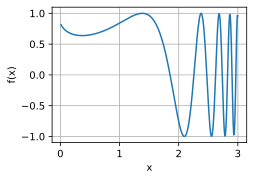

In [2]:
# Plot a weird function in a normal range
x_big = np.arange(0.01,3.01,0.01)
ys = np.sin(x_big**x_big)
d2l.plot(x_big, ys, 'x', 'f(x)')

In this graph, the eagle-eyed amongst us will notice that our strange function $f(x) = \sin(x^x)$ plotted over a wide range $[0, 3]$ has a very dramatical change.  However, if we zoom into a tiny segment, the behavior seems to be far simpler: it is just a straight line.

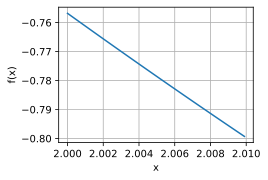

In [3]:
# Plot a the same weird function in a tiny range
x_big = np.arange(2.0,2.01,0.0001)
ys = np.sin(x_big**x_big)
d2l.plot(x_big, ys, 'x', 'f(x)')

For most functions, it is reasonable to expect that as we shift the $x$ value of the function by a little bit, the output $f(x)$ will also be shifted by a little bit.  The only question we need to answer is, "How large is the change in the output compared to the change in the input?  Is it half as large?  Twice as large?"

Thus, what we can consider is to take the change in the output, divide it by the change in input, and see how large it is.  We can write this formally as

$$
\frac{L(x+\epsilon) - L(x)}{(x+\epsilon) - x} = \frac{L(x+\epsilon) - L(x)}{\epsilon}.
$$

This is already enough to start to play around with in code.  For instance, suppose we know that $L(x) = x^{2} + 1701(x-4)^3$, then we can see how large this value is at the point $x = 4$ as follows.

In [4]:
# Define our function
L = lambda x: x**2 + 1701*(x-4)**3

# print the difference divided by epsilon for several epsilon
for epsilon in [0.1,0.001,0.0001,0.00001] :
    print("epsilon = {:.5f} -> {:.5f}".format(
        epsilon,(L(4+epsilon)-L(4))/epsilon))

epsilon = 0.10000 -> 25.11000
epsilon = 0.00100 -> 8.00270
epsilon = 0.00010 -> 8.00012
epsilon = 0.00001 -> 8.00001


Now, if we are observant, we will notice that the output of this number is suspiciously close to $8$.  Indeed, if we fiddle with the $\epsilon$ value, and make it smaller, we will see values progressively closer to $8$.  Thus we may conclude, correctly, that the value we seek (the degree a change in the input changes the output) should be $8$ at the point $x=4$.  The way that a mathematician encodes this fact is

$$
\lim_{\epsilon \rightarrow 0}\frac{L(4+\epsilon) - L(4)}{\epsilon} = 8.
$$

As a bit of a historical digression: in the first few decades of neural network research, scientists used this algorithm (the *method of finite differences*) to evaluate how a loss function changed under small perturbation: just change the weights and see how the loss changed.  This is computationally inefficient, requiring two evaluations of the loss function to see how a single change of one variable influenced the loss.  If we tried to do this with even a paltry few thousand parameters, it would require several thousand evaluations of the network over the entire dataset!  It was not solved until 1986 that the *backpropagation algorithm* introduced in a paper by [Rumelhart et al., 1986](https://www.nature.com/articles/323533a0), which provides how *any* change of the weights together would change the loss. In this paper, the rule of calculus efficiently utilizes same computation time as a single prediction of the network over the dataset.

Back in our example, this value of the change $8$ is different based on different values of $x$, so it makes sense to define a function about $x$.  More formally, this value dependent rate of change is referred to as the *derivative* as

$$
\frac{df}{dx}(x) = \lim_{\epsilon \rightarrow 0}\frac{f(x+\epsilon) - f(x)}{\epsilon}.
$$

We will often encounter many different notations for the derivative in many different texts. For instance, all of the below notations indicate the same thing:

$$
\frac{df}{dx} = \frac{d}{dx}f = f' = \nabla_xf = D_xf = f_x.
$$

Most authors will pick a single notation and stick with it, however even that is not guaranteed.  It is best to be familiar with all of these.  We will use the notation $\frac{df}{dx}$ throughout this text, unless we want to take the derivative of a complex expression, in which case we will use $\frac{d}{dx}f$ to write expressions like
$$
\frac{d}{dx}\left[x^4+\cos\left(\frac{x^2+1}{2x-1}\right)\right].
$$

Often times, it is intuitively useful to unravel the definition of derivative again to see how a function changes when we make a small change of $x$:

$$
\begin{aligned}
\frac{df}{dx}(x) = \lim_{\epsilon \rightarrow 0}\frac{f(x+\epsilon) - f(x)}{\epsilon} & \implies \frac{df}{dx}(x) \approx \frac{f(x+\epsilon) - f(x)}{\epsilon} \\
& \implies \epsilon \frac{df}{dx}(x) \approx f(x+\epsilon) - f(x) \\
& \implies f(x+\epsilon) \approx f(x) + \epsilon \frac{df}{dx}(x).
\end{aligned}
$$

In this way, we can understand the derivative as the scaling factor that tells us how large of change we get in the output from a change in the input.

## Rules of Calculus

:label:`sec_derivative_table`


A full formal treatment of calculus would derive everything from first principles.  We will not indulge in this temptation here, but rather list the most commonly encountered derivatives, and provide an understanding of the common rules.

### Common Derivatives
When computing derivatives, one can often times use a series of rules to reduce the computation to a few core functions.  In a full calculus class, we would derive an extensive table of dozens of fundamental derivatives.  Below, we  summarize only most important ones encountered in practice-about 90% of the derivatives we will encounter on a regular basis will be some combination of these.

* **Derivative of constants.** $\frac{d}{dx}c = 0$.
* **Derivative of linear functions.** $\frac{d}{dx}(ax) = a$.
* **Power rule.** $\frac{d}{dx}x^n = nx^{n-1}$.
* **Derivative of exponentials.** $\frac{d}{dx}e^x = e^x$.
* **Derivative of the logarithm.** $\frac{d}{dx}\log(x) = \frac{1}{x}$.

### Derivative Rules
If we needed to compute every derivative separately and store them in a table, there would be an infinite amount of them.  It is a gift of mathematics that we can generalize the above derivatives and compute more complex derivatives like finding the derivative of $f(x) = \log\left(1+(x-1)^{10}\right)$.  The key to doing so is to codify what happens when we take functions and combine them in various ways, most importantly: sums, products, and compositions.

* **Sum rule.** $\frac{d}{dx}(g(x) + h(x)) = \frac{dg}{dx}(x) + \frac{dh}{dx}(x)$.
* **Product rule.** $\frac{d}{dx}(g(x)\cdot h(x)) = g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x)$.
* **Chain rule.** $\frac{d}{dx}g(h(x)) = \frac{dg}{dh}(h(x))\cdot \frac{dh}{dx}(x)$.

It gives us excellent intuition into how one can reason with small changes in the input.  First, for the sum rule, we may examine the following chain of reasoning:

$$
\begin{aligned}
f(x+\epsilon) & = g(x+\epsilon) + h(x+\epsilon) \\
& \approx g(x) + \epsilon \frac{dg}{dx}(x) + h(x) + \epsilon \frac{dh}{dx}(x) \\
& = g(x) + h(x) + \epsilon\left(\frac{dg}{dx}(x) + \frac{dh}{dx}(x)\right) \\
& = f(x) + \epsilon\left(\frac{dg}{dx}(x) + \frac{dh}{dx}(x)\right).
\end{aligned}
$$

Thus by comparing with the fact that $f(x+\epsilon) \approx f(x) + \epsilon \frac{df}{dx}(x)$, we see that $\frac{df}{dx}(x) = \frac{dg}{dx}(x) + \frac{dh}{dx}(x)$ as desired.  The intuition here is: when we change the input $x$, $g$ and $h$ jointly contribute to the change of the output by $\frac{dg}{dx}(x)$ and $\frac{dh}{dx}(x)$.


Next, the product is more subtle, and will require a new observation about how to work with these expressions.  We will begin as before:

$$
\begin{aligned}
f(x+\epsilon) & = g(x+\epsilon)\cdot h(x+\epsilon) \\
& \approx (g(x) + \epsilon \frac{dg}{dx}(x))\cdot(h(x) + \epsilon \frac{dh}{dx}(x)) \\
& = g(x)\cdot h(x) + \epsilon\left(g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x)\right) + \epsilon^2\frac{dg}{dx}(x)\frac{dh}{dx}(x) \\
& = f(x) + \epsilon\left(g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x)\right) + \epsilon^2\frac{dg}{dx}(x)\frac{dh}{dx}(x). \\
\end{aligned}
$$


This resembles the computation done above, and indeed we see our answer ($\frac{df}{dx}(x) = g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x)$) sitting there next to $\epsilon$, but there is the issue of that term of size $\epsilon^{2}$.  We will refer to this as a *higher-order term*, since the power of $\epsilon^2$ is higher than the power of $\epsilon^1$.  We will see in a later section that we will sometimes want to keep track of these, however for now observe that if $\epsilon = 0.0000001$, then $\epsilon^{2}= 0.0000000000001$, which is vastly smaller.  As we send $\epsilon \rightarrow 0$, we may safely ignore the higher order terms.  As a general convention in this appendix, we will use "$\approx$" to denote that the two terms are equal up to higher order terms,  In this case, we can easily be more formal.  If we looked at the difference quotient

$$
\frac{f(x+\epsilon) - f(x)}{\epsilon} = g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x) + \epsilon \frac{dg}{dx}(x)\frac{dh}{dx}(x),
$$

and thus as we send $\epsilon \rightarrow 0$, the right hand term goes to zero as well.  This gives the product rule.

Finally, with the chain rule, we can again progress as before and see that

$$
\begin{aligned}
f(x+\epsilon) & = g(h(x+\epsilon)) \\
& \approx g\left(h(x) + \epsilon \frac{dh}{dx}(x)\right) \\
& \approx g(h(x)) + \epsilon \frac{dh}{dx}(x) \frac{dg}{dh}(h(x))\\
& = f(x) + \epsilon \frac{dg}{dh}(h(x))\frac{dh}{dx}(x),
\end{aligned}
$$

where in the second line we view the function $g$ as having its input ($h(x)$) shifted by the tiny quantity $\epsilon \frac{dh}{dx}(x)$.

In this way we see that we can flexibly combine all our derivative rules to compute essentially any expression desired.  For instance,

$$
\begin{aligned}
\frac{d}{dx}\left[\log\left(1+(x-1)^{10}\right)\right] & = \left(1+(x-1)^{10}\right)^{-1}\frac{d}{dx}\left[1+(x-1)^{10}\right]\\
& = \left(1+(x-1)^{10}\right)^{-1}\left(\frac{d}{dx}[1] + \frac{d}{dx}[(x-1)^{10}]\right) \\
& = \left(1+(x-1)^{10}\right)^{-1}\left(0 + 10(x-1)^9\frac{d}{dx}[x-1]\right) \\
& = 10\left(1+(x-1)^{10}\right)^{-1}(x-1)^9 \\
& = \frac{10(x-1)^9}{1+(x-1)^{10}}.
\end{aligned}
$$

Where each line has used the following rules:

1. The chain rule and derivative of logarithm.
2. The sum rule.
3. The derivative of constants, chain rule, and power rule.
4. The sum rule, derivative of linear functions, derivative of constants.

Two things should be clear after doing this example:

1. Any function we can write down using sums, products, constants, powers, exponentials, and logarithms can have its derivate computed mechanically by following these rules.
2. Having a human follow these rules can be tedious and error prone!  For the types of functions encountered in deep learning, we should think of the function compositions as being potentially hundreds of layers deep or more.

Thankfully, these two facts together hint towards a way forward: this is a perfect candidate for mechanization!  Indeed backpropagation is exactly finding an efficient way to apply these derivative rules.

### As Linear Approximation
When working with derivatives, it is often useful to geometrically interpret the approximation used above.  In particular, note that the equation 

$$
f(x+\epsilon) \approx f(x) + \epsilon \frac{df}{dx}(x),
$$

approximates the value of $f$ by a line which passes through the point $(x,f(x))$ and has slope $\frac{df}{dx}(x)$.  In this way we say that the derivative gives a linear approximation to the function $f$, as illustrated below:

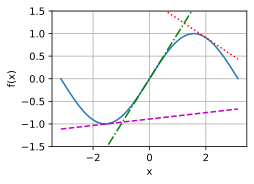

In [5]:
# Compute sin
xs = np.arange(-np.pi,np.pi,0.01)
plots = [np.sin(xs)]

# Compute some linear approximations. Use d(sin(x))/dx = cos(x)
for x0 in [-1.5,0,2] :
    plots.append(np.sin(x0) + (xs-x0)*np.cos(x0))

d2l.plot(xs, plots, 'x', 'f(x)', ylim=[-1.5,1.5])

### Higher Order Derivatives

From the above we know enough to employ the derivative rules to find the derivative $\frac{df}{dx}$ of any function $f$. Indeed, the derivative function tells us how the function $f$ is changing near a point, giving the rate of change of the function $f$ at that point.  However, the derivative function $\frac{df}{dx}$ can be viewed as a regular function, so nothing stops us from computing the derivative of $\frac{df}{dx}$ to get $\frac{d^2f}{dx^2} = \frac{df}{dx}\left(\frac{df}{dx}\right)$, the second derivative of $f$.  This function is the rate of change of the rate of change of $f$, or in other words, how the rate of change is changing. Furthermore, by executing the derivative function over and over again, we can generalize from the second derivative to the $n$-th derivative. To keep the notation clean, we will denote the $n$-th derivative as 

$$
f^{(n)}(x) = \frac{d^{n}f}{dx^{n}} = \left(\frac{d}{dx}\right)^{n} f.
$$

Below, we visualize the $f^{(2)}(x)$, $f^{(1)}(x)$, and $f(x)$.  First, if the second derivative $f^{(2)}(x)$ is a positive constant, that means that the first derivative is increasing.  As a result, the first derivative $f^{(1)}(x)$ may start out negative, becomes zero at a point, and then becomes positive in the end. Therefore, the function $f$ itself decreases, flattens out, then increases.  In other words, the function $f$ curves up, and has a single minimum.

![If we assume the second derivative is a positive constant, then the fist derivative in increasing, which implies the function itself has a minimum.](../img/posSecDer.svg)


Second, if the second derivative is a negative constant, that means that the first derivative is decreasing.  Following that the first derivative may start out positive, becomes zero at a point, and then becomes negative. Hence, the function $f$ itself increases, flattens out, then decreases.  In other words, the function $f$ curves down, and has a single maximum.

![If we assume the second derivative is a negative constant, then the fist derivative in decreasing, which implies the function itself has a maximum.](../img/negSecDer.svg)


Third, if the second derivative is a always zero, then the first derivative will never change---it is constant!  This means that $f$ increases at a fixed rate, and $f$ is itself a straight line.

![If we assume the second derivative is zero, then the fist derivative is constant, which implies the function itself is a straight line.](../img/zeroSecDer.svg)



To sum up, the second derivative can be interpreted as giving the way that the function $f$ curves.  A positive second derivative leads to a upwards curve, while a negative second derivative means that $f$ curves downwards, and a zero second derivative means that $f$ does not curve at all.

Technically, if a second derivative exists, we can simply derive each order of the derivatives of $f$. Taking the function $g(x) = ax^{2}+ bx + c$ as an example.  We can then compute that

$$
\begin{aligned}
\frac{dg}{dx}(x) & = 2ax + b \\
\frac{d^2g}{dx^2}(x) & = 2a.
\end{aligned}
$$


Similarly to the previous section showed that the best approximation of the first derivative is a line, we can illustrate the best approximation of a function by a quadratic using both the first and second derivative. This results from a famous *Taylor series*, which are going to discuss in the next section. Before that, let us grab a taste of how to approximate the function $\sin(x)$.

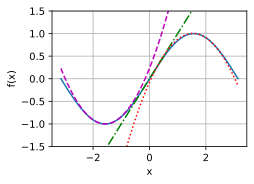

In [6]:
# Compute sin
xs = np.arange(-np.pi,np.pi,0.01)
plots = [np.sin(xs)]

# Compute some quadratic approximations. Use d(sin(x))/dx = cos(x)
for x0 in [-1.5,0,2] :
    plots.append(np.sin(x0) + (xs-x0)*np.cos(x0) - (xs-x0)**2*np.sin(x0)/2)

d2l.plot(xs, plots, 'x', 'f(x)', ylim=[-1.5,1.5])

### Taylor Series


*Taylor series* is applicable when we try to approximate the function $f(x)$, by given values all the $n$-th derivative value at a data point $x_0$, i.e., $\left\{ f(x_0), f^{(1)}(x_0), f^{(2)}(x_0), \ldots, f^{(n)}(x) \right\}$. Let us start with the simplest case $n = 2$.  With a little algebra:

$$
f(x) \approx \frac{1}{2}\frac{d^2f}{dx^2}(x_0)(x-x_0)^{2}+ \frac{df}{dx}(x_0)(x-x_0) + f(x_0).
$$

As we can see above, the denominator of $2$ is there to cancel out the $2$ we get when we take two derivatives of $x^2$, while the other terms are all zero.  Same logic applies for the first derivative and the value itself.


If we push the logic further to $n=3$, we will conclude a similar approximation as:

$$
f(x) \approx \frac{\frac{d^3f}{dx^3}(x_0)}{6}(x-x_0)^3 + \frac{\frac{d^2f}{dx^2}(x_0)}{2}(x-x_0)^{2}+ \frac{df}{dx}(x_0)(x-x_0) + f(x_0).
$$

where the $6 = 3 \times 2 = 3!$ comes from the number we get if we take three derivatives of $x^3$.


Furthermore, we can get a degree $n$ polynomial by 

$$
P_n(x) = \sum_{i = 0}^{n} \frac{f^{(i)}(x_0)}{i!}(x-x_0)^{i}.
$$

where the notation 

$$
f^{(n)}(x) = \frac{d^{n}f}{dx^{n}} = \left(\frac{d}{dx}\right)^{n} f.
$$


Indeed, P_n(x) can be viewed as the best $n$-th degree polynomial approximation to our function $f(x)$.

While we are not going to dive all the way into the error of the above approximations, it is worth to mention that the infinite scenario. In this case, for well behaved functions (known as real analytic functions) like $\cos(x)$ or $e^{x}$ we can write out the infinite number of terms and approximate the exactly same function

$$
f(x) = \sum_{n = 0}^\infty \frac{f^{(n)}(x_0)}{n!}(x-x_0)^{n}.
$$

Take $f(x) = e^{x}$ as am example. Since $e^{x}$ is its own derivative, we know that $f^{(n)}(x) = e^{x}$. Therefore, $e^{x} $ can be reconstructed by taking the Taylor series at $x_0 = 0$, i.e.,

$$
e^{x} = \sum_{n = 0}^\infty \frac{x^{n}}{n!} = 1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \cdots.
$$


After equipping with the the basic maths, let us see how this works in code and observe how increasing the degree of the Taylor approximation brings us closer to the desired function $e^x$.

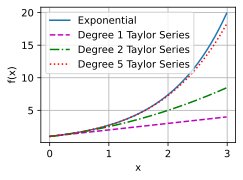

In [7]:
# Compute the exponential function
xs = np.arange(0,3,0.01)
ys = np.exp(xs)

# Compute a few Taylor series approximations
P1 = 1 + xs
P2 = 1 + xs + xs**2/2
P5 = 1 + xs + xs**2/2 + xs**3/6 + xs**4/24 + xs**5/120

d2l.plot(xs, [ys,P1,P2,P5], 'x', 'f(x)', legend = [
    "Exponential", "Degree 1 Taylor Series", "Degree 2 Taylor Series",
    "Degree 5 Taylor Series"])

In a nutshell, Taylor series have two primary applications:

1. *Theoretical applications*: Often when we try to understand a too complex function, using Taylor series enables we turn it into a polynomial that we can work with directly.

2. *Numerical applications*: Similarly, some functions like $e^{x}$ or $\cos(x)$ are  difficult for machines to compute.  They can store tables of values at a fixed precision (and this is often done), but it still leaves open questions like "What is the 1000-th digit of $\cos(1)$?"  Taylor series are often helpful to answer such questions.  


## Summary

* Derivatives can be used to express how functions change when we change the input by a small amount.
* Elementary derivatives can be combined using derivative rules to create arbitrarily complex derivatives.
* Derivatives can be iterated to get second or higher order derivatives.  Each increase in order provides more fine grained information on the behavior of the function.
* Using information in the derivatives of a single data point, we can approximate well behaved functions by polynomials obtained from the Taylor series.


## Exercises

1. What is the derivative of $x^3-4x+1$?
2. What is the derivative of $\log(\frac{1}{x})$?
3. True or False: If $f'(x) = 0$ then $f$ has a maximum or minimum at $x$?
4. Where is the minimum of $f(x) = x\log(x)$ for $x\ge0$ (where we assume that $f$ takes the limiting value of $0$ at $f(0)$)?